# Fashion MNIST Example

## <span style="font-size:25px">Fashion MNIST Example</span>

In [12]:
# 데이터 불러오기

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\ntrain.shape =', x_train.shape, ', train_label.shape =', t_train.shape)
print('\ntest.shape =', x_test.shape, ', test_label.shape =', t_test.shape)

print('\ntrian label =', t_train)   # 학습 데이터 정답 출력
print('\ntest label =', t_test)     # 테스트 데이터 정답 출력


train.shape = (60000, 28, 28) , train_label.shape = (60000,)

test.shape = (10000, 28, 28) , test_label.shape = (10000,)

trian label = [9 0 0 ... 3 0 5]

test label = [9 2 1 ... 8 1 5]


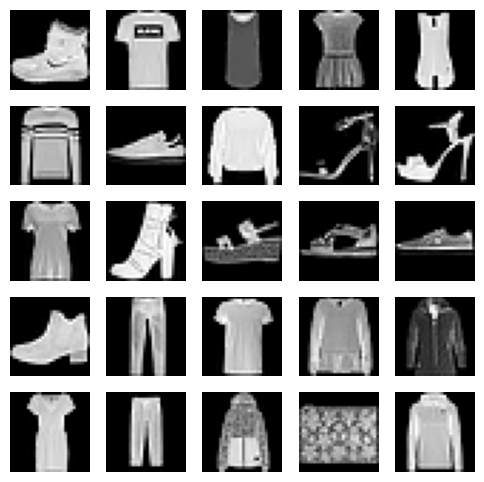

In [13]:
# 데이터 확인

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))    # 25개의 이미지 출력

for index in range(25):

  plt.subplot(5, 5, index + 1)    # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

In [16]:
# 학습 데이터/테스트 데이터 정규화(Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 원핫 인코딩은 수행하지 않음

#from tensorflow.keras.utils import to_categorical

#t_train = to_categorical(t_train, num_classes=10)
#t_test = to_categorical(t_test, num_classes=10)

In [17]:
# 모델 구축

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # Flatten 없이 사용하려면 차원이 1D이어야 한다.
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# 모델 컴파일

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',     # 원핫인코딩 방식이 아니기에
              metrics=['accuracy'])                       # sparse 사용

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모델 학습

hist = model.fit(x_train, t_train, epochs=50, validation_split=0.3, verbose=2)

Epoch 1/50
1313/1313 - 4s - 3ms/step - accuracy: 0.7932 - loss: 0.5802 - val_accuracy: 0.8003 - val_loss: 0.5621
Epoch 2/50
1313/1313 - 5s - 4ms/step - accuracy: 0.8065 - loss: 0.5464 - val_accuracy: 0.8096 - val_loss: 0.5348
Epoch 3/50
1313/1313 - 3s - 3ms/step - accuracy: 0.8166 - loss: 0.5208 - val_accuracy: 0.8184 - val_loss: 0.5147
Epoch 4/50
1313/1313 - 6s - 5ms/step - accuracy: 0.8237 - loss: 0.5013 - val_accuracy: 0.8255 - val_loss: 0.4960
Epoch 5/50
1313/1313 - 4s - 3ms/step - accuracy: 0.8305 - loss: 0.4858 - val_accuracy: 0.8258 - val_loss: 0.4859
Epoch 6/50
1313/1313 - 5s - 4ms/step - accuracy: 0.8349 - loss: 0.4728 - val_accuracy: 0.8329 - val_loss: 0.4721
Epoch 7/50
1313/1313 - 4s - 3ms/step - accuracy: 0.8379 - loss: 0.4622 - val_accuracy: 0.8356 - val_loss: 0.4668
Epoch 8/50
1313/1313 - 5s - 4ms/step - accuracy: 0.8414 - loss: 0.4530 - val_accuracy: 0.8392 - val_loss: 0.4568
Epoch 9/50
1313/1313 - 5s - 3ms/step - accuracy: 0.8446 - loss: 0.4456 - val_accuracy: 0.8408 - 

In [21]:
# 모델 정확도 평가

model.evaluate(x_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7210 - loss: 84.8437


[88.92420196533203, 0.7128000259399414]

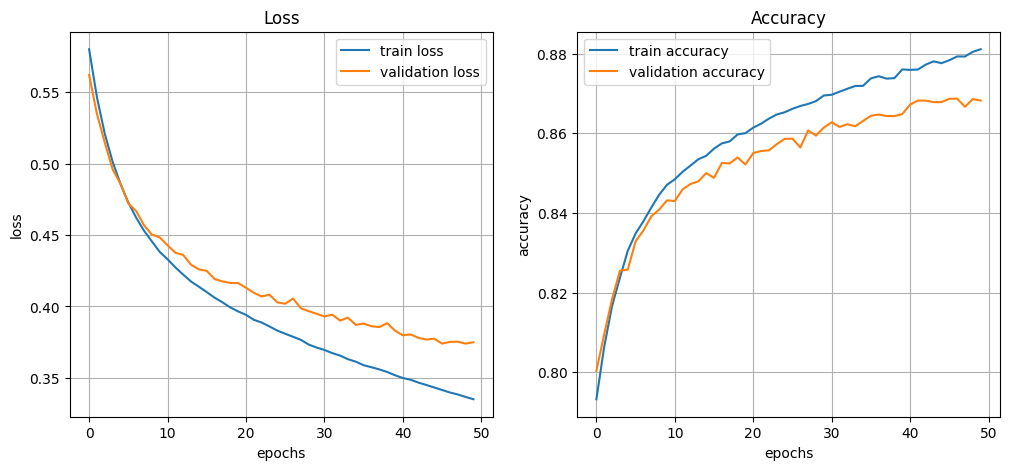

In [22]:
# 출력 방식
plt.figure(figsize=(12, 5))

# Loss Trend

plt.subplot(1, 2, 1)    # 1행, 2열, 1번째
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')


# Accurate Trend

plt.subplot(1, 2, 2)    # 1행, 2열, 2번째
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')


plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


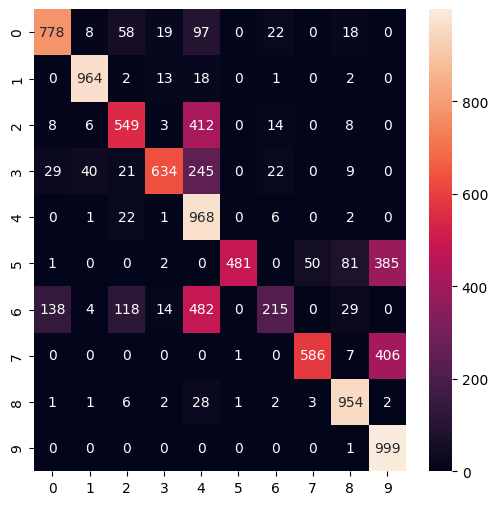

In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test,
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()